# Importing packages

In [1]:
%matplotlib inline

import math
import numpy as np 
from scipy import stats
import pandas as pd                        # standard neccessary packages
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings                                         # To disable warnings
warnings.simplefilter('ignore')

pd.options.display.float_format = '{:,.5f}'.format

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_squared_error                       # metric for time series analysis
from statsmodels.tsa.vector_ar.vecm import coint_johansen            #Johansen Cointegration test

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\mybes\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\mybes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\mybes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Data loading and Data Understanding:

In [2]:
df=pd.read_csv('train.csv')      # loading the  dataset

In [3]:
df.head()                        # First five rows of the dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store=pd.read_csv('store.csv')            # loading the store dataset

In [5]:
store.head()                      # First five rows of the dataset

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,"1,270.00000",9.00000,"2,008.00000",0,NaN,NaN,NaN
1,2,a,a,570.00000,11.00000,"2,007.00000",1,13.00000,"2,010.00000","Jan,Apr,Jul,Oct"
2,3,a,a,"14,130.00000",12.00000,"2,006.00000",1,14.00000,"2,011.00000","Jan,Apr,Jul,Oct"
3,4,c,c,620.00000,9.00000,"2,009.00000",0,NaN,NaN,NaN
4,5,a,a,"29,910.00000",4.00000,"2,015.00000",0,NaN,NaN,NaN


In [6]:
print(df.shape)
print(store.shape)          # Checking the shapes of datasets

(1017209, 9)
(1115, 10)


In [7]:
df.info()                  # viewing the column information (non null count,dtype) of df dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
store.info()              # viewing the column information (non null count,dtype) of store dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
df.describe()   # statistical information of all numerical columns of df.

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,"1,017,209.00000","1,017,209.00000","1,017,209.00000","1,017,209.00000","1,017,209.00000","1,017,209.00000","1,017,209.00000"
mean,558.42973,3.99834,"5,773.81897",633.14595,0.83011,0.38151,0.17865
std,321.90865,1.99739,"3,849.92618",464.41173,0.37554,0.48576,0.38306
min,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,280.00000,2.00000,"3,727.00000",405.00000,1.00000,0.00000,0.00000
50%,558.00000,4.00000,"5,744.00000",609.00000,1.00000,0.00000,0.00000
75%,838.00000,6.00000,"7,856.00000",837.00000,1.00000,1.00000,0.00000
max,"1,115.00000",7.00000,"41,551.00000","7,388.00000",1.00000,1.00000,1.00000


In [10]:
store.describe()    # statistical information of all numerical columns of store.

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,"1,115.00000","1,112.00000",761.00000,761.00000,"1,115.00000",571.00000,571.00000
mean,558.00000,"5,404.90108",7.22470,"2,008.66886",0.51211,23.59545,"2,011.76357"
std,322.01708,"7,663.17472",3.21235,6.19598,0.50008,14.14198,1.67494
min,1.00000,20.00000,1.00000,"1,900.00000",0.00000,1.00000,"2,009.00000"
25%,279.50000,717.50000,4.00000,"2,006.00000",0.00000,13.00000,"2,011.00000"
50%,558.00000,"2,325.00000",8.00000,"2,010.00000",1.00000,22.00000,"2,012.00000"
75%,836.50000,"6,882.50000",10.00000,"2,013.00000",1.00000,37.00000,"2,013.00000"
max,"1,115.00000","75,860.00000",12.00000,"2,015.00000",1.00000,50.00000,"2,015.00000"


In [11]:
df=pd.merge(df, store, how = 'inner', on = 'Store')     # Merging the both dataframes based on common column(Store)

In [12]:
df.head()       # first five rows of merged dataframe.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,"1,270.00000",9.00000,"2,008.00000",0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,"1,270.00000",9.00000,"2,008.00000",0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,"1,270.00000",9.00000,"2,008.00000",0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,"1,270.00000",9.00000,"2,008.00000",0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,"1,270.00000",9.00000,"2,008.00000",0,NaN,NaN,NaN


In [13]:
df.sort_values(by='Date',inplace=True)

In [14]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,"5,350.00000",NaN,NaN,1,22.00000,"2,012.00000","Mar,Jun,Sept,Dec"
679363,746,2,2013-01-01,0,0,0,0,a,1,d,c,"4,330.00000",2.00000,"2,011.00000",1,35.00000,"2,011.00000","Mar,Jun,Sept,Dec"
155193,171,2,2013-01-01,0,0,0,0,a,1,a,a,"2,640.00000",NaN,NaN,0,NaN,NaN,NaN
632403,694,2,2013-01-01,0,0,0,0,a,1,a,c,460.00000,11.00000,"2,012.00000",1,40.00000,"2,014.00000","Jan,Apr,Jul,Oct"
361623,396,2,2013-01-01,0,0,0,0,a,1,a,c,"23,130.00000",NaN,NaN,0,NaN,NaN,NaN


In [15]:
df.shape               # Shape of the merged dataframe

(1017209, 18)

In [16]:
df.info()           # Column info of merged dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 1017208 to 0
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [17]:
df.describe()     # Statistical info of all numerical columns of merged dataframe

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,"1,017,209.00000","1,017,209.00000","1,017,209.00000","1,017,209.00000","1,017,209.00000","1,017,209.00000","1,017,209.00000","1,014,567.00000","693,861.00000","693,861.00000","1,017,209.00000","509,178.00000","509,178.00000"
mean,558.42973,3.99834,"5,773.81897",633.14595,0.83011,0.38151,0.17865,"5,430.08565",7.22287,"2,008.69023",0.50056,23.26909,"2,011.75277"
std,321.90865,1.99739,"3,849.92618",464.41173,0.37554,0.48576,0.38306,"7,715.32370",3.21183,5.99264,0.50000,14.09597,1.66287
min,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,20.00000,1.00000,"1,900.00000",0.00000,1.00000,"2,009.00000"
25%,280.00000,2.00000,"3,727.00000",405.00000,1.00000,0.00000,0.00000,710.00000,4.00000,"2,006.00000",0.00000,13.00000,"2,011.00000"
50%,558.00000,4.00000,"5,744.00000",609.00000,1.00000,0.00000,0.00000,"2,330.00000",8.00000,"2,010.00000",1.00000,22.00000,"2,012.00000"
75%,838.00000,6.00000,"7,856.00000",837.00000,1.00000,1.00000,0.00000,"6,890.00000",10.00000,"2,013.00000",1.00000,37.00000,"2,013.00000"
max,"1,115.00000",7.00000,"41,551.00000","7,388.00000",1.00000,1.00000,1.00000,"75,860.00000",12.00000,"2,015.00000",1.00000,50.00000,"2,015.00000"


# Data Cleaning:

## Checking for duplicates:

In [18]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,"5,350.00000",NaN,NaN,1,22.00000,"2,012.00000","Mar,Jun,Sept,Dec"
679363,746,2,2013-01-01,0,0,0,0,a,1,d,c,"4,330.00000",2.00000,"2,011.00000",1,35.00000,"2,011.00000","Mar,Jun,Sept,Dec"
155193,171,2,2013-01-01,0,0,0,0,a,1,a,a,"2,640.00000",NaN,NaN,0,NaN,NaN,NaN
632403,694,2,2013-01-01,0,0,0,0,a,1,a,c,460.00000,11.00000,"2,012.00000",1,40.00000,"2,014.00000","Jan,Apr,Jul,Oct"
361623,396,2,2013-01-01,0,0,0,0,a,1,a,c,"23,130.00000",NaN,NaN,0,NaN,NaN,NaN


In [19]:
df.shape

(1017209, 18)

In [20]:
df.duplicated(subset=['Date','Store'])[0]==True        # If both date and store values are same it can be considered duplicates.

False

In [21]:
# So no duplicates......

## Creating Index:

In [22]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,"5,350.00000",NaN,NaN,1,22.00000,"2,012.00000","Mar,Jun,Sept,Dec"
679363,746,2,2013-01-01,0,0,0,0,a,1,d,c,"4,330.00000",2.00000,"2,011.00000",1,35.00000,"2,011.00000","Mar,Jun,Sept,Dec"
155193,171,2,2013-01-01,0,0,0,0,a,1,a,a,"2,640.00000",NaN,NaN,0,NaN,NaN,NaN
632403,694,2,2013-01-01,0,0,0,0,a,1,a,c,460.00000,11.00000,"2,012.00000",1,40.00000,"2,014.00000","Jan,Apr,Jul,Oct"
361623,396,2,2013-01-01,0,0,0,0,a,1,a,c,"23,130.00000",NaN,NaN,0,NaN,NaN,NaN


In [23]:
df.reset_index(drop=True,inplace=True)
df.set_index('Date',inplace=True)                    # deleting and resetting the index

In [24]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1,d,c,"5,350.00000",NaN,NaN,1,22.00000,"2,012.00000","Mar,Jun,Sept,Dec"
2013-01-01,746,2,0,0,0,0,a,1,d,c,"4,330.00000",2.00000,"2,011.00000",1,35.00000,"2,011.00000","Mar,Jun,Sept,Dec"
2013-01-01,171,2,0,0,0,0,a,1,a,a,"2,640.00000",NaN,NaN,0,NaN,NaN,NaN
2013-01-01,694,2,0,0,0,0,a,1,a,c,460.00000,11.00000,"2,012.00000",1,40.00000,"2,014.00000","Jan,Apr,Jul,Oct"
2013-01-01,396,2,0,0,0,0,a,1,a,c,"23,130.00000",NaN,NaN,0,NaN,NaN,NaN


## Dropping Unneccessary columns:

In [25]:
# After watching the columns i think Promo,Promo interval should be dropped as they are not much useful in modelling.

df.drop(['Promo','PromoInterval','CompetitionOpenSinceMonth'],axis=1,inplace=True)

In [26]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Date,,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,0,a,1,d,c,"5,350.00000",NaN,1,22.00000,"2,012.00000"
2013-01-01,746,2,0,0,0,a,1,d,c,"4,330.00000","2,011.00000",1,35.00000,"2,011.00000"
2013-01-01,171,2,0,0,0,a,1,a,a,"2,640.00000",NaN,0,NaN,NaN
2013-01-01,694,2,0,0,0,a,1,a,c,460.00000,"2,012.00000",1,40.00000,"2,014.00000"
2013-01-01,396,2,0,0,0,a,1,a,c,"23,130.00000",NaN,0,NaN,NaN


In [27]:
df.shape

(1017209, 14)

## Handling null values:

In [28]:
df.shape

(1017209, 14)

In [29]:
df.isnull().sum()        # Checking for null values

Store                            0
DayOfWeek                        0
Sales                            0
Customers                        0
Open                             0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance           2642
CompetitionOpenSinceYear    323348
Promo2                           0
Promo2SinceWeek             508031
Promo2SinceYear             508031
dtype: int64

In [30]:
dict={}                        # getting null value percentage for each column.
for i in df.columns:
    dict[i]=round((df[i].isnull().sum()/df[i].shape[0])*100,2)
dict

{'Store': 0.0,
 'DayOfWeek': 0.0,
 'Sales': 0.0,
 'Customers': 0.0,
 'Open': 0.0,
 'StateHoliday': 0.0,
 'SchoolHoliday': 0.0,
 'StoreType': 0.0,
 'Assortment': 0.0,
 'CompetitionDistance': 0.26,
 'CompetitionOpenSinceYear': 31.79,
 'Promo2': 0.0,
 'Promo2SinceWeek': 49.94,
 'Promo2SinceYear': 49.94}

In [31]:
# now we need to deal with these null values
# Since Promo2SinceWeek and year has around 50% null values we can drop them
df.drop(['Promo2SinceWeek','Promo2SinceYear'],axis=1,inplace=True)

In [32]:
df.shape

(1017209, 12)

In [33]:
df.isnull().sum()

Store                            0
DayOfWeek                        0
Sales                            0
Customers                        0
Open                             0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance           2642
CompetitionOpenSinceYear    323348
Promo2                           0
dtype: int64

In [34]:
df['CompetitionOpenSinceYear'].describe()
# Since it is a year column we can use mode for imputation.

count   693,861.00000
mean      2,008.69023
std           5.99264
min       1,900.00000
25%       2,006.00000
50%       2,010.00000
75%       2,013.00000
max       2,015.00000
Name: CompetitionOpenSinceYear, dtype: float64

In [35]:
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0],inplace=True)

In [36]:
df.isnull().sum()

Store                          0
DayOfWeek                      0
Sales                          0
Customers                      0
Open                           0
StateHoliday                   0
SchoolHoliday                  0
StoreType                      0
Assortment                     0
CompetitionDistance         2642
CompetitionOpenSinceYear       0
Promo2                         0
dtype: int64

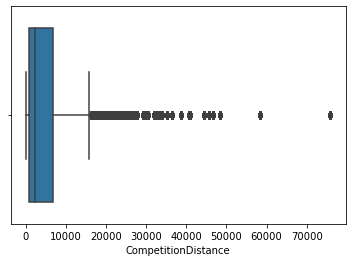

In [37]:
# Since it is a continuos variable we ca either use mean/median for imputation.

sns.boxplot(df['CompetitionDistance'])
plt.show()

In [38]:
# We can see that it is clearly effected by outliers so we use median for imputaion.
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(),inplace=True)

In [39]:
df.isnull().sum().sum()             # Null values handled

0

## Feature Engineering:

In [40]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceYear,Promo2
Date,,,,,,,,,,,,
2013-01-01,1115,2,0,0,0,a,1,d,c,"5,350.00000","2,013.00000",1
2013-01-01,746,2,0,0,0,a,1,d,c,"4,330.00000","2,011.00000",1
2013-01-01,171,2,0,0,0,a,1,a,a,"2,640.00000","2,013.00000",0
2013-01-01,694,2,0,0,0,a,1,a,c,460.00000,"2,012.00000",1
2013-01-01,396,2,0,0,0,a,1,a,c,"23,130.00000","2,013.00000",0


In [41]:
df['CompetitionOpenSinceYear']=df['CompetitionOpenSinceYear'].apply(lambda x: 2021-int(x))
df.rename(columns={'CompetitionOpenSinceYear':'Competition since years'},inplace=True)

In [42]:
df['CompetitionDistance']=df['CompetitionDistance'].apply(lambda x:math.ceil(int(x)/1000))
df.rename(columns={'CompetitionDistance':'CompetitionDistance_KM'},inplace=True)

In [43]:
# From the DayOfWeek model we can create is_weekend variable which can has great effect on sales column

In [44]:
df['DayOfWeek'].value_counts()

4    145845
5    145845
3    145665
2    145664
6    144730
7    144730
1    144730
Name: DayOfWeek, dtype: int64

In [45]:
df.insert(2,'is_weekend',df['DayOfWeek'].apply(lambda x:1 if (x==6 or x==7) else 0))
# We are inserting it right next to DayOf Week variable

In [46]:
df.head()

,Store,DayOfWeek,is_weekend,Sales,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance_KM,Competition since years,Promo2
Date,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1,d,c,6,8,1
2013-01-01,746,2,0,0,0,0,a,1,d,c,5,10,1
2013-01-01,171,2,0,0,0,0,a,1,a,a,3,8,0
2013-01-01,694,2,0,0,0,0,a,1,a,c,1,9,1
2013-01-01,396,2,0,0,0,0,a,1,a,c,24,8,0


## Sanity Checks:

In [47]:
df.head()

,Store,DayOfWeek,is_weekend,Sales,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance_KM,Competition since years,Promo2
Date,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1,d,c,6,8,1
2013-01-01,746,2,0,0,0,0,a,1,d,c,5,10,1
2013-01-01,171,2,0,0,0,0,a,1,a,a,3,8,0
2013-01-01,694,2,0,0,0,0,a,1,a,c,1,9,1
2013-01-01,396,2,0,0,0,0,a,1,a,c,24,8,0


In [48]:
df['Open'].value_counts()     # no wrong entries

1    844392
0    172817
Name: Open, dtype: int64

In [49]:
df['StoreType'].value_counts()        # no wrong entries

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [50]:
df['Assortment'].value_counts()          # no wrong entries

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [51]:
# All the categorical columns are in order(no irregular entries)

## Checking for skewness

In [52]:
df.head()

,Store,DayOfWeek,is_weekend,Sales,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance_KM,Competition since years,Promo2
Date,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1,d,c,6,8,1
2013-01-01,746,2,0,0,0,0,a,1,d,c,5,10,1
2013-01-01,171,2,0,0,0,0,a,1,a,a,3,8,0
2013-01-01,694,2,0,0,0,0,a,1,a,c,1,9,1
2013-01-01,396,2,0,0,0,0,a,1,a,c,24,8,0


In [53]:
df.skew(axis = 0, skipna = True)     # Skewness of every variable

Store                     -0.00095
DayOfWeek                  0.00159
is_weekend                 0.95494
Sales                      0.64146
Customers                  1.59865
Open                      -1.75804
SchoolHoliday              1.67784
CompetitionDistance_KM     2.95391
Competition since years    7.88466
Promo2                    -0.00226
dtype: float64

In [54]:
for i in ['CompetitionDistance_KM','Competition since years']:
    df[i]=np.log10(df[i])

In [55]:
df.head()

,Store,DayOfWeek,is_weekend,Sales,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance_KM,Competition since years,Promo2
Date,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1,d,c,0.77815,0.90309,1
2013-01-01,746,2,0,0,0,0,a,1,d,c,0.69897,1.00000,1
2013-01-01,171,2,0,0,0,0,a,1,a,a,0.47712,0.90309,0
2013-01-01,694,2,0,0,0,0,a,1,a,c,0.00000,0.95424,1
2013-01-01,396,2,0,0,0,0,a,1,a,c,1.38021,0.90309,0


In [56]:
df.skew(axis = 0, skipna = True)

Store                     -0.00095
DayOfWeek                  0.00159
is_weekend                 0.95494
Sales                      0.64146
Customers                  1.59865
Open                      -1.75804
SchoolHoliday              1.67784
CompetitionDistance_KM     0.47113
Competition since years    1.04946
Promo2                    -0.00226
dtype: float64

In [57]:
# we can see that skewness for CompetitionDistance_km,Competition since year has decreased a lot.

# Exploratory Data Analysis:

## Univariate Analysis:

In [58]:
df.head()

,Store,DayOfWeek,is_weekend,Sales,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance_KM,Competition since years,Promo2
Date,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1,d,c,0.77815,0.90309,1
2013-01-01,746,2,0,0,0,0,a,1,d,c,0.69897,1.00000,1
2013-01-01,171,2,0,0,0,0,a,1,a,a,0.47712,0.90309,0
2013-01-01,694,2,0,0,0,0,a,1,a,c,0.00000,0.95424,1
2013-01-01,396,2,0,0,0,0,a,1,a,c,1.38021,0.90309,0


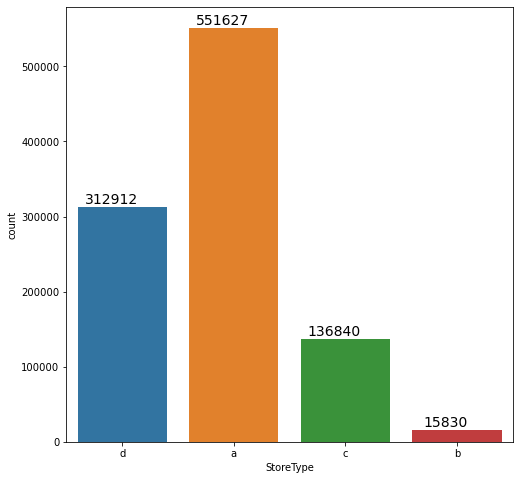

In [59]:
# count plot is used for plotting unique values of column and their counts.
plt.figure(figsize=[8,8])
g=sns.countplot(x='StoreType',data=df)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=14)
plt.show()

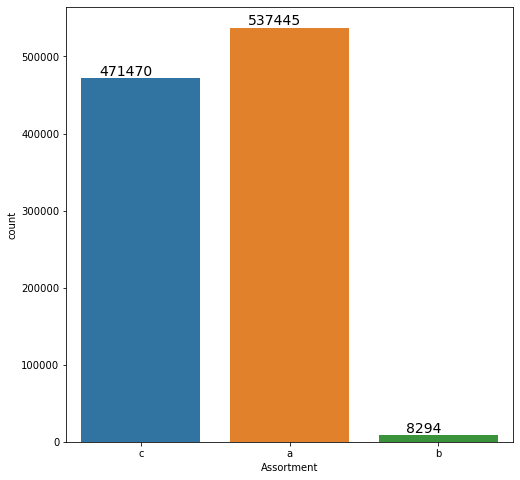

In [60]:
plt.figure(figsize=[8,8])
g=sns.countplot(x='Assortment',data=df)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=14)
plt.show()

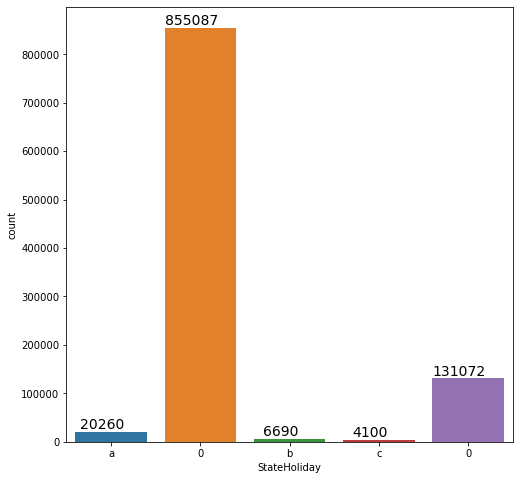

In [61]:
plt.figure(figsize=[8,8])
g=sns.countplot(x='StateHoliday',data=df)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=14)
plt.show()

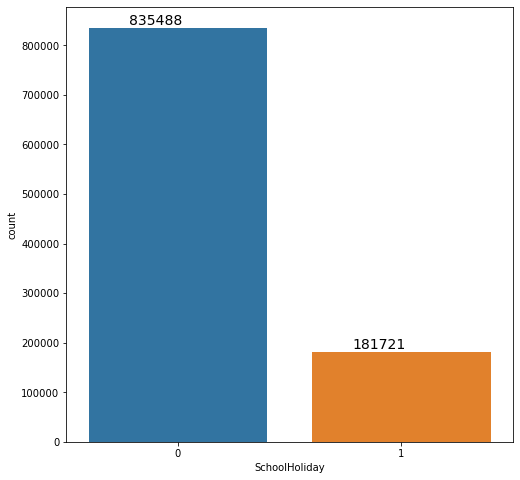

In [62]:
plt.figure(figsize=[8,8])
g=sns.countplot(x='SchoolHoliday',data=df)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=14)
plt.show()

## Bivariate Analysis:

In [63]:
df.head()

,Store,DayOfWeek,is_weekend,Sales,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance_KM,Competition since years,Promo2
Date,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1,d,c,0.77815,0.90309,1
2013-01-01,746,2,0,0,0,0,a,1,d,c,0.69897,1.00000,1
2013-01-01,171,2,0,0,0,0,a,1,a,a,0.47712,0.90309,0
2013-01-01,694,2,0,0,0,0,a,1,a,c,0.00000,0.95424,1
2013-01-01,396,2,0,0,0,0,a,1,a,c,1.38021,0.90309,0


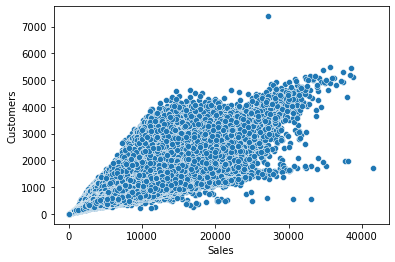

In [64]:
sns.scatterplot(df['Sales'],df['Customers'])
plt.show()

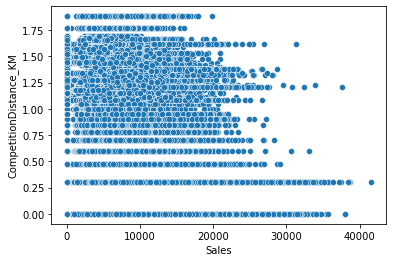

In [65]:
sns.scatterplot(df['Sales'],df['CompetitionDistance_KM'])
plt.show()

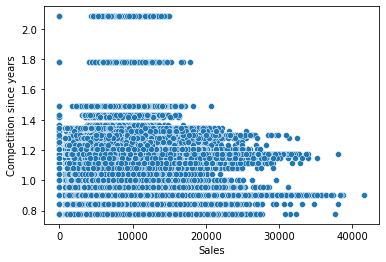

In [66]:
sns.scatterplot(df['Sales'],df['Competition since years'])
plt.show()

In [67]:
# We can see that Customers variable has good linear relationship with Sales variable.

## Correlation Analysis

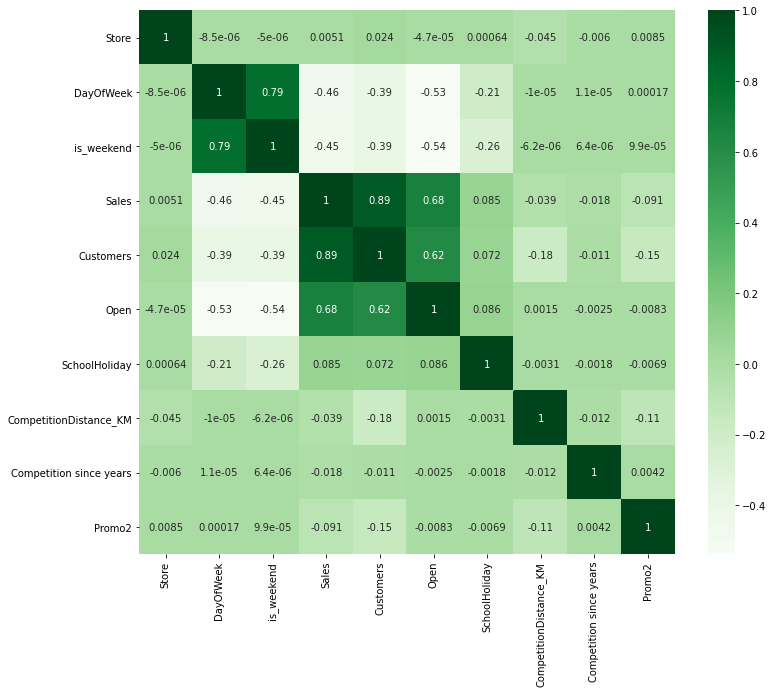

In [68]:
plt.figure(figsize=[12,10])
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [69]:
# We can see that Sales column has good correlation with Customers,DayOfWeek,is_weekend,Open variables.

# Store 1:

In [70]:
df_1=df[df['Store']==1]
df_1.head()

,Store,DayOfWeek,is_weekend,Sales,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance_KM,Competition since years,Promo2
Date,,,,,,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1,c,a,0.30103,1.11394,0
2013-01-02,1,3,0,5530,668,1,0,1,c,a,0.30103,1.11394,0
2013-01-03,1,4,0,4327,578,1,0,1,c,a,0.30103,1.11394,0
2013-01-04,1,5,0,4486,619,1,0,1,c,a,0.30103,1.11394,0
2013-01-05,1,6,1,4997,635,1,0,1,c,a,0.30103,1.11394,0


In [71]:
df_1.shape

(942, 13)

## Outlier Analysis:

In [72]:
#Here we perform outlier analysis for sales and customers variables.

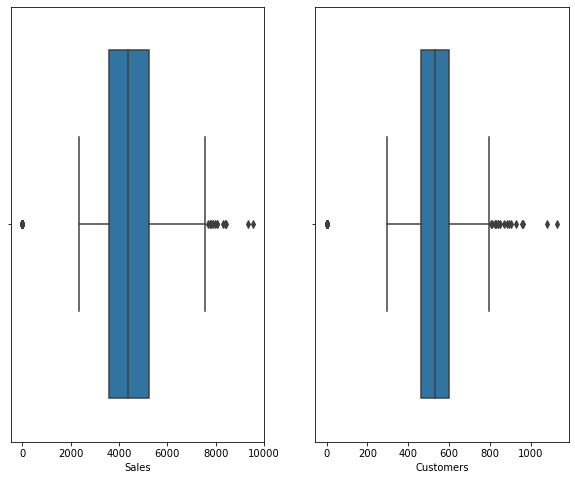

In [73]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_1['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_1['Customers'])

In [74]:
# We need to cap the outliers to their 99 percentile value.
df_1['Sales']=df_1['Sales'].clip(lower=df_1['Sales'].min(),upper=df_1['Sales'].quantile(0.99))
df_1['Customers']=df_1['Customers'].clip(lower=df_1['Customers'].min(),upper=df_1['Customers'].quantile(0.99))

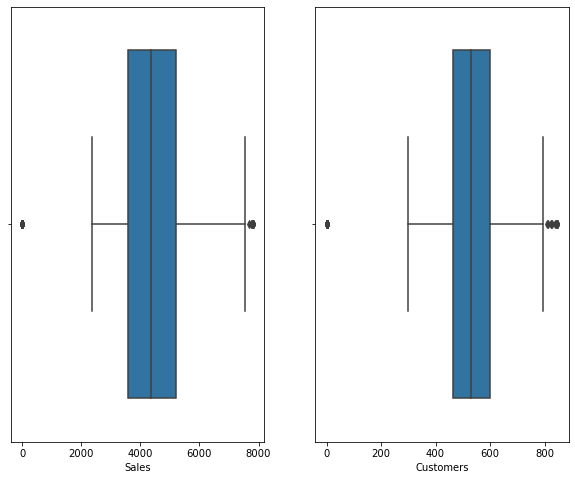

In [75]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_1['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_1['Customers'])

In [76]:
# We can see that outliers are minimized.

## Null value handling:

In [77]:
# If Sales/Customers value ==0 consider them as 0.
df_1['Sales']=df_1['Sales'].apply(lambda x:np.nan if x==0 else x)
df_1['Customers']=df_1['Customers'].apply(lambda x:np.nan if x==0 else x)

In [78]:
df_1[['Sales','Customers']].isnull().sum()

Sales        161
Customers    161
dtype: int64

In [79]:
# Since we have capped the outliers we can use mean for imputation.

### Mean imputation:

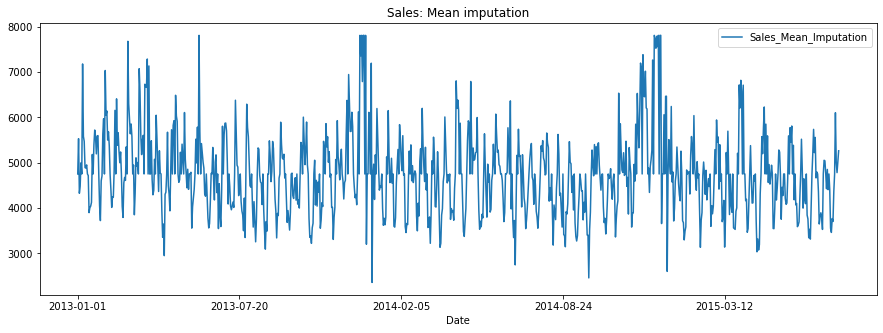

In [80]:
df_1.insert(4,'Sales_Mean_Imputation',df_1.Sales.fillna(df_1.Sales.mean()))
df_1[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [81]:
df_1.head()

,Store,DayOfWeek,is_weekend,Sales,Sales_Mean_Imputation,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance_KM,Competition since years,Promo2
Date,,,,,,,,,,,,,,
2013-01-01,1,2,0,NaN,"4,751.87503",NaN,0,a,1,c,a,0.30103,1.11394,0
2013-01-02,1,3,0,"5,530.00000","5,530.00000",668.00000,1,0,1,c,a,0.30103,1.11394,0
2013-01-03,1,4,0,"4,327.00000","4,327.00000",578.00000,1,0,1,c,a,0.30103,1.11394,0
2013-01-04,1,5,0,"4,486.00000","4,486.00000",619.00000,1,0,1,c,a,0.30103,1.11394,0
2013-01-05,1,6,1,"4,997.00000","4,997.00000",635.00000,1,0,1,c,a,0.30103,1.11394,0


In [82]:
df_1.drop(['Sales'],axis=1,inplace=True)
df_1.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

In [83]:
df_1.head()

,Store,DayOfWeek,is_weekend,Sales,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance_KM,Competition since years,Promo2
Date,,,,,,,,,,,,,
2013-01-01,1,2,0,"4,751.87503",NaN,0,a,1,c,a,0.30103,1.11394,0
2013-01-02,1,3,0,"5,530.00000",668.00000,1,0,1,c,a,0.30103,1.11394,0
2013-01-03,1,4,0,"4,327.00000",578.00000,1,0,1,c,a,0.30103,1.11394,0
2013-01-04,1,5,0,"4,486.00000",619.00000,1,0,1,c,a,0.30103,1.11394,0
2013-01-05,1,6,1,"4,997.00000",635.00000,1,0,1,c,a,0.30103,1.11394,0


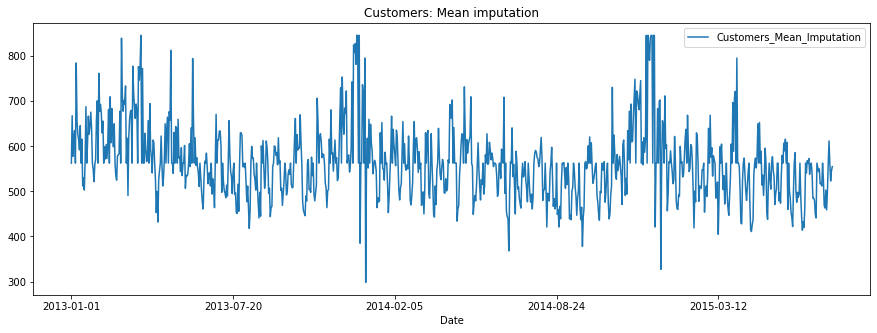

In [84]:
# Do the same mean imputation for Customers variable
df_1.insert(5,'Customers_Mean_Imputation',df_1.Customers.fillna(df_1.Customers.mean()))
df_1[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [85]:
df_1.drop(['Customers'],axis=1,inplace=True)
df_1.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

In [86]:
# convert both sales and customers to int
df_1['Sales']=df_1['Sales'].astype('int64')
df_1['Customers']=df_1['Customers'].astype('int64')
df_1.head()

,Store,DayOfWeek,is_weekend,Sales,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance_KM,Competition since years,Promo2
Date,,,,,,,,,,,,,
2013-01-01,1,2,0,4751,562,0,a,1,c,a,0.30103,1.11394,0
2013-01-02,1,3,0,5530,668,1,0,1,c,a,0.30103,1.11394,0
2013-01-03,1,4,0,4327,578,1,0,1,c,a,0.30103,1.11394,0
2013-01-04,1,5,0,4486,619,1,0,1,c,a,0.30103,1.11394,0
2013-01-05,1,6,1,4997,635,1,0,1,c,a,0.30103,1.11394,0


## Train-Test split:

In [87]:
train_len=900

In [88]:
train=df_1[0:train_len]
test=df_1[train_len:]

In [89]:
train.shape

(900, 13)

In [90]:
test.shape

(42, 13)

## Stationarity test (ADF test):

In [91]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



Sales: ADF test results:
ADF Statistic: -5.355618
p-value: 0.000004
Critical Values:
	5%: -2.865


Customers: ADF test results:
ADF Statistic: -3.808792
p-value: 0.002819
Critical Values:
	5%: -2.865


In [92]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Model Building:

## SARIMAX:

In [93]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Open']) 
model_fit = model.fit()
print(model_fit.params)

Open           289.57024
ar.L1            0.58895
ma.L1           -1.00000
ar.S.L12         0.08534
ma.S.L12        -0.99920
sigma2     532,662.38857
dtype: float64


In [94]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  900
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -7135.194
Date:                            Tue, 09 Jan 2024   AIC                          14282.387
Time:                                    01:51:28   BIC                          14311.114
Sample:                                01-01-2013   HQIC                         14293.369
                                     - 06-19-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open         289.5702     51.064      5.671      0.000     189.487     389.653
ar.L1          0.5890      0.023     26.021      0.000       0.545       0.633
ma.L1         -1.0000      0.561     -1.783      0.075      -2.099       0.099
ar.S.L12       0.0853      0.033      2.579      0.010       0.020       0.150
ma.S.L12      -0.9992      0.568     -1.759      0.079      -2.113       0.114
sigma2      5.327e+05      0.000   3.04e+09      0.000    5.33e+05    5.33e+05
===================================================================================
Ljung-Box (L1) (Q):                  11.26   Jarque-Bera (JB):               252.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.06e+26. Standard errors may be unstable.
"""

In [95]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Open'])

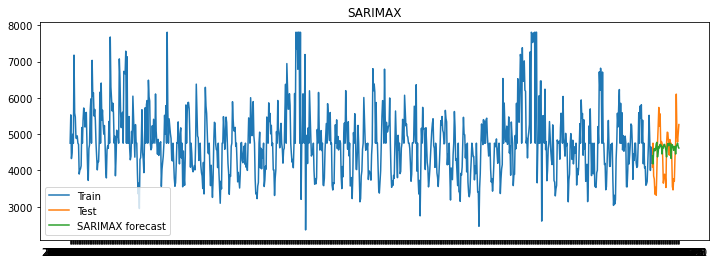

In [96]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [97]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,SARIMAX,720.22000,14.75000


## Cointegration Johnason test:

In [98]:
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [99]:
joh_model1 = coint_johansen(df[['Sales','Customers','CompetitionDistance_KM','Competition since years']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model1)

   max_eig_stat    trace_stat
0 411,949.03587 870,043.68730
1 351,718.14305 458,094.65143
2 103,159.47970 106,376.50838
3   3,217.02868   3,217.02868 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[21.837  24.1592 29.0609]
 [15.7175 17.7961 22.2519]
 [ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[37.0339 40.1749 46.5716]
 [21.7781 24.2761 29.5147]
 [10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



## VARMAX-1:

In [109]:
train.head()

,Store,DayOfWeek,is_weekend,Sales,Customers,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance_KM,Competition since years,Promo2
Date,,,,,,,,,,,,,
2013-01-01,1,2,0,"4,751.00000",562.00000,0,a,1,c,a,0.30103,1.11394,0
2013-01-02,1,3,0,"5,530.00000",668.00000,1,0,1,c,a,0.30103,1.11394,0
2013-01-03,1,4,0,"4,327.00000",578.00000,1,0,1,c,a,0.30103,1.11394,0
2013-01-04,1,5,0,"4,486.00000",619.00000,1,0,1,c,a,0.30103,1.11394,0
2013-01-05,1,6,1,"4,997.00000",635.00000,1,0,1,c,a,0.30103,1.11394,0


In [110]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [111]:
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=train['DayOfWeek'])
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12148.264
Date:                    Tue, 09 Jan 2024   AIC                          24322.529
Time:                            02:01:58   BIC                          24384.960
Sample:                        01-01-2013   HQIC                         24346.378
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             4.80, 2.84   Jarque-Bera (JB):       145.93, 152.32
Prob(Q):                        0.03, 0.09   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.08, 0.94   Skew:                       0.88, 0.21
Prob(H) (two-sided):            0.53, 0.60   Kurtosis:                   3.90, 4.97


In [114]:
pred_var = test[['Sales', 'Customers']].copy()
exog = test['DayOfWeek']
pred_var['Sales'] = res.predict(pred_var.index.min(), pred_var.index.max(),exog=exog)

ValueError: Columns must be same length as key

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### VARMAX-2:

In [106]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(1,1)   Log Likelihood              -12115.619
Date:                    Tue, 09 Jan 2024   AIC                          24257.238
Time:                            00:49:50   BIC                          24319.669
Sample:                        01-01-2013   HQIC                         24281.087
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            0.09, 13.30   Jarque-Bera (JB):       182.63, 189.39
Prob(Q):                        0.77, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.11, 1.00   Skew:                       1.03, 0.32
Prob(H) (two-sided):            0.39, 0.98   Kurtosis:                   3.78, 5.15


In [107]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

ValueError: Columns must be same length as key

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### VARMAX 3:

In [ ]:
df.head()

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### VARMAX 4:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(4,4), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

In [ ]:
# After comparing all the five models VARMAX 3 is the best model to forecast sales for Store 1. 

# Store 3

In [ ]:
df_3=df[df['Store']==3]

In [ ]:
df_3.head()

## Outlier Analysis:

In [ ]:
#Here we perform outlier analysis for sales and customers variables.

In [ ]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_3['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_3['Customers'])

In [ ]:
# We need to cap the outliers to their 99 percentile value.
df_3['Sales']=df_3['Sales'].clip(lower=df_3['Sales'].min(),upper=df_3['Sales'].quantile(0.99))
df_3['Customers']=df_3['Customers'].clip(lower=df_3['Customers'].min(),upper=df_3['Customers'].quantile(0.99))

In [ ]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_3['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_3['Customers'])

In [ ]:
# We can see that outliers are minimized.

## Null value handling:

In [ ]:
# If Sales/Customers value ==0 consider them as 0.
df_3['Sales']=df_3['Sales'].apply(lambda x:np.nan if x==0 else x)
df_3['Customers']=df_3['Customers'].apply(lambda x:np.nan if x==0 else x)

In [ ]:
df_3[['Sales','Customers']].isnull().sum()

In [ ]:
# Since we have capped the outliers we can use mean for imputation.

### Mean imputation:

In [ ]:
df_3.insert(4,'Sales_Mean_Imputation',df_3.Sales.fillna(df_3.Sales.mean()))
df_3[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [ ]:
# since mean imputation is preferable we will drop sales and rename sales mean imputation as sales.
df_3.drop(['Sales'],axis=1,inplace=True)
df_3.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

In [ ]:
df_3.head()

In [ ]:
# Do the same mean imputation for Customers variable
df_3.insert(5,'Customers_Mean_Imputation',df_3.Customers.fillna(df_3.Customers.mean()))
df_3[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [ ]:
df_3.drop(['Customers'],axis=1,inplace=True)
df_3.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

In [ ]:
df_3.head()

## Train-Test Split:

In [ ]:
train_len=900
train=df_3[0:train_len]
test=df_3[train_len:]

In [ ]:
print(train.shape)
print(test.shape)

## Stationarity Test (ADF Test):

In [ ]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))

In [ ]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Model Building:

### Sarimax:

In [ ]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Open']) 
model_fit = model.fit()
print(model_fit.params)

In [ ]:
model_fit.summary()

In [ ]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Open'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

### VARMAX:

#### Cointegration - Johanson test:

In [ ]:
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [ ]:
joh_model1 = coint_johansen(df[['Sales','Customers','CompetitionDistance_KM','Competition since years']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model1)

In [ ]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n',exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VAR')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 2:

In [ ]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 3:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 4:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(4,4), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

In [ ]:
# After comparing all the five models VARMAX 4 is the best model to forecast sales for Store 3. 

# Store - 8 :

In [ ]:
df_8=df[df['Store']==8]
df_8.head()

In [ ]:
df_8.shape

## Outlier Analysis:

In [ ]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_8['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_8['Customers'])

In [ ]:
# We need to cap the outliers to their 99 percentile value.
df_8['Sales']=df_8['Sales'].clip(lower=df_8['Sales'].min(),upper=df_8['Sales'].quantile(0.99))
df_8['Customers']=df_8['Customers'].clip(lower=df_8['Customers'].min(),upper=df_8['Customers'].quantile(0.99))

In [ ]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_8['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_8['Customers'])

In [ ]:
# We can see that outliers are minimized.

## Null values handling:

In [ ]:
# If Sales/Customers value ==0 consider them as null.
df_8['Sales']=df_8['Sales'].apply(lambda x:np.nan if x==0 else x)
df_8['Customers']=df_8['Customers'].apply(lambda x:np.nan if x==0 else x)

In [ ]:
df_8[['Sales','Customers']].isnull().sum()

In [ ]:
# Since we have capped the outliers we can use mean for imputation.

## Mean imputation:

In [ ]:
df_8.insert(4,'Sales_Mean_Imputation',df_8.Sales.fillna(df_8.Sales.mean()))
df_8[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [ ]:
df_8.drop(['Sales'],axis=1,inplace=True)
df_8.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

In [ ]:
# Do the same mean imputation for Customers variable
df_8.insert(5,'Customers_Mean_Imputation',df_8.Customers.fillna(df_8.Customers.mean()))
df_8[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [ ]:
df_8.drop(['Customers'],axis=1,inplace=True)
df_8.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

In [ ]:
# convert both sales and customers to int
df_8['Sales']=df_8['Sales'].astype('int64')
df_8['Customers']=df_8['Customers'].astype('int64')
df_8.head()

## Train-Test Split:

In [ ]:
train=df_8[0:train_len]
test=df_8[train_len:]

In [ ]:
train.shape

In [ ]:
test.shape

## Stationarity test(ADF test):

In [ ]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))

## Model Building:

### SARIMAX:

In [ ]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Customers']) 
model_fit = model.fit()
print(model_fit.params)

In [ ]:
model_fit.summary()

In [ ]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 1:

In [ ]:
train.head()

In [ ]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [ ]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 2:

In [ ]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### VARMAX 3:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### VARMAX 4:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(6,6), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

In [ ]:
# After comparing all the five models SARIMAX is the best model to forecast sales for Store 8. 

# Store 9:

In [ ]:
df_9=df[df['Store']==9]
df_9.head()

In [ ]:
df_9.shape

## Outliers Analysis:

In [ ]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_9['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_9['Customers'])

In [ ]:
# We need to cap the outliers to their 99 percentile value.
df_9['Sales']=df_9['Sales'].clip(lower=df_9['Sales'].min(),upper=df_9['Sales'].quantile(0.99))
df_9['Customers']=df_9['Customers'].clip(lower=df_9['Customers'].min(),upper=df_9['Customers'].quantile(0.99))

In [ ]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_9['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_9['Customers'])

In [ ]:
# We can see that outliers are minimized.

## Handling null values:

In [ ]:
# If Sales/Customers value ==0 consider them as null.
df_9['Sales']=df_9['Sales'].apply(lambda x:np.nan if x==0 else x)
df_9['Customers']=df_9['Customers'].apply(lambda x:np.nan if x==0 else x)

In [ ]:
df_9[['Sales','Customers']].isnull().sum()

## Mean imputation:

In [ ]:
df_9.insert(4,'Sales_Mean_Imputation',df_9.Sales.fillna(df_9.Sales.mean()))
df_9[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [ ]:
df_9.drop(['Sales'],axis=1,inplace=True)
df_9.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

In [ ]:
# Do the same mean imputation for Customers variable
df_9.insert(5,'Customers_Mean_Imputation',df_9.Customers.fillna(df_9.Customers.mean()))
df_9[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [ ]:
df_9.drop(['Customers'],axis=1,inplace=True)
df_9.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

## Train-Test Split:

In [ ]:
train=df_9[0:train_len]
test=df_9[train_len:]

In [ ]:
train.shape

In [ ]:
test.shape

## Stationarity test (ADF test):

In [ ]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))

In [ ]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Model Building:

### SARIMAX:

In [ ]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Promo2']) 
model_fit = model.fit()
print(model_fit.params)

In [ ]:
model_fit.summary()

In [ ]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Promo2'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

### VARMAX 1:

In [ ]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [ ]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 2:

In [ ]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### VARMAX 3:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### VARMAX 4:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(6,6), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

In [ ]:
# After comparing all the five models VARMAX 3 is the best model to forecast sales for Store 9. 

# Store 13:

In [ ]:
df_13=df[df['Store']==13]

In [ ]:
df_13.head()

In [ ]:
df_13.shape

## Outlier Analysis:

In [ ]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_13['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_13['Customers'])

In [ ]:
# We need to cap the outliers to their 99 percentile value.
df_13['Sales']=df_13['Sales'].clip(lower=df_13['Sales'].min(),upper=df_13['Sales'].quantile(0.99))
df_13['Customers']=df_13['Customers'].clip(lower=df_13['Customers'].min(),upper=df_13['Customers'].quantile(0.99))

In [ ]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_13['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_13['Customers'])

In [ ]:
# We can see that outliers are minimized.

## Null Value Handling:

In [ ]:
# If Sales/Customers value ==0 consider them as null.
df_13['Sales']=df_13['Sales'].apply(lambda x:np.nan if x==0 else x)
df_13['Customers']=df_13['Customers'].apply(lambda x:np.nan if x==0 else x)

In [ ]:
df_13[['Sales','Customers']].isnull().sum()

In [ ]:
# Since we have capped the outliers we can use mean for imputation.

## Mean imputation:

In [ ]:
df_13.insert(4,'Sales_Mean_Imputation',df_13.Sales.fillna(df_13.Sales.mean()))
df_13[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [ ]:
df_13.drop(['Sales'],axis=1,inplace=True)
df_13.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

In [ ]:
# Do the same mean imputation for Customers variable
df_13.insert(5,'Customers_Mean_Imputation',df_13.Customers.fillna(df_13.Customers.mean()))
df_13[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [ ]:
df_13.drop(['Customers'],axis=1,inplace=True)
df_13.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

## Train-Test Split:

In [ ]:
train=df_1[0:train_len]
test=df_1[train_len:]

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train.tail(2)

## Stationarity test:

In [ ]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))

In [ ]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Modelling:

### SARIMAX:

In [ ]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Customers']) 
model_fit = model.fit()
print(model_fit.params)

In [ ]:
model_fit.summary()

In [ ]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

### VARMAX 1:

In [ ]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [ ]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 2:

In [ ]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 3:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 4:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(6,6), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

In [ ]:
# After comparing all the five models SARIMAX  is the best model to forecast sales for Store 13. 

# Store 25:

In [ ]:
df_25=df[df['Store']==25]
df_25.head()

In [ ]:
df_25.shape

## Outlier Analysis:

In [ ]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_25['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_25['Customers'])

In [ ]:
# We need to cap the outliers to their 99 percentile value.
df_25['Sales']=df_25['Sales'].clip(lower=df_25['Sales'].min(),upper=df_25['Sales'].quantile(0.99))
df_25['Customers']=df_25['Customers'].clip(lower=df_25['Customers'].min(),upper=df_25['Customers'].quantile(0.99))

In [ ]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_25['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_25['Customers'])

In [ ]:
# We can see that outliers are minimized.

## Handling Null values:

In [ ]:
# If Sales/Customers value ==0 consider them as null.
df_25['Sales']=df_25['Sales'].apply(lambda x:np.nan if x==0 else x)
df_25['Customers']=df_25['Customers'].apply(lambda x:np.nan if x==0 else x)

In [ ]:
df_25[['Sales','Customers']].isnull().sum()

## Mean imputation:

In [ ]:
df_25.insert(4,'Sales_Mean_Imputation',df_25.Sales.fillna(df_25.Sales.mean()))
df_25[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [ ]:
df_25.drop(['Sales'],axis=1,inplace=True)
df_25.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

In [ ]:
# Do the same mean imputation for Customers variable
df_25.insert(5,'Customers_Mean_Imputation',df_25.Customers.fillna(df_25.Customers.mean()))
df_25[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [ ]:
df_25.drop(['Customers'],axis=1,inplace=True)
df_25.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

## Train-Test Split:

In [ ]:
train_len=900

In [ ]:
train=df_25[0:train_len]
test=df_25[train_len:]

In [ ]:
train.shape

In [ ]:
test.shape

## Stationarity test (ADF):

In [ ]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))

In [ ]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Model Building:

## SARIMAX:

In [ ]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Customers']) 
model_fit = model.fit()
print(model_fit.params)

In [ ]:
model_fit.summary()

In [ ]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 1:

In [ ]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [ ]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 2:

In [ ]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 3:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 4:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(6,6), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

In [ ]:
# After comparing all the five models SARIMAX is the best model to forecast sales for Store 25. 

# Store 29:

In [ ]:
df_29=df[df['Store']==29]
df_29.head()

In [ ]:
df_29.shape

## Outlier detection:

In [ ]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_29['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_29['Customers'])

In [ ]:
# We need to cap the outliers to their 99 percentile value.
df_29['Sales']=df_29['Sales'].clip(lower=df_29['Sales'].min(),upper=df_29['Sales'].quantile(0.99))
df_29['Customers']=df_29['Customers'].clip(lower=df_29['Customers'].min(),upper=df_29['Customers'].quantile(0.99))

In [ ]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_29['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_29['Customers'])

## Null Values Handling:

In [ ]:
# If Sales/Customers value ==0 consider them as null.
df_29['Sales']=df_29['Sales'].apply(lambda x:np.nan if x==0 else x)
df_29['Customers']=df_29['Customers'].apply(lambda x:np.nan if x==0 else x)

In [ ]:
df_29[['Sales','Customers']].isnull().sum()

## Mean imputation:

In [ ]:
df_29.insert(4,'Sales_Mean_Imputation',df_29.Sales.fillna(df_29.Sales.mean()))
df_29[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [ ]:
df_29.drop(['Sales'],axis=1,inplace=True)
df_29.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

In [ ]:
# Do the same mean imputation for Customers variable
df_29.insert(5,'Customers_Mean_Imputation',df_29.Customers.fillna(df_29.Customers.mean()))
df_29[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [ ]:
df_29.drop(['Customers'],axis=1,inplace=True)
df_29.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

## Train-Test Split:

In [ ]:
train=df_29[0:train_len]
test=df_29[train_len:]

In [ ]:
train.shape

In [ ]:
test.shape

## Stationary test (ADF):

In [ ]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))

In [ ]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Model Building:

## SARIMAX:

In [ ]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['is_weekend']) 
model_fit = model.fit()
print(model_fit.params)

In [ ]:
model_fit.summary()

In [ ]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['is_weekend'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 1:

In [ ]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [ ]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 2:

In [ ]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### VARMAX 3:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 4:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(6,6), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

In [ ]:
# After comparing all the five models VARMAX 3 is the best model to forecast sales for Store 29. 

# Store 31:

In [ ]:
df_31=df[df['Store']==31]
df_31.head()

In [ ]:
df_31.shape

## Outlier Analysis:

In [ ]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_31['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_31['Customers'])

In [ ]:
# We need to cap the outliers to their 99 percentile value.
df_31['Sales']=df_31['Sales'].clip(lower=df_31['Sales'].min(),upper=df_31['Sales'].quantile(0.99))
df_31['Customers']=df_31['Customers'].clip(lower=df_31['Customers'].min(),upper=df_31['Customers'].quantile(0.99))

In [ ]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_31['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_31['Customers'])

In [ ]:
# We can see that outliers are minimized.

## Null value handling:

In [ ]:
# If Sales/Customers value ==0 consider them as null.
df_31['Sales']=df_31['Sales'].apply(lambda x:np.nan if x==0 else x)
df_31['Customers']=df_31['Customers'].apply(lambda x:np.nan if x==0 else x)

In [ ]:
df_31[['Sales','Customers']].isnull().sum()

## Mean imputation:

In [ ]:
df_31.insert(4,'Sales_Mean_Imputation',df_31.Sales.fillna(df_31.Sales.mean()))
df_31[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [ ]:
df_31.drop(['Sales'],axis=1,inplace=True)
df_31.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

In [ ]:
# Do the same mean imputation for Customers variable
df_31.insert(5,'Customers_Mean_Imputation',df_31.Customers.fillna(df_31.Customers.mean()))
df_31[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [ ]:
df_31.drop(['Customers'],axis=1,inplace=True)
df_31.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

## Train-Test Split:

In [ ]:
train=df_31[0:train_len]
test=df_31[train_len:]

In [ ]:
train.shape

In [ ]:
test.shape

## Stationary test (ADF):

In [ ]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(train[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))

In [ ]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Model Building:

## SARIMAX:

In [ ]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Customers']) 
model_fit = model.fit()
print(model_fit.params)

In [ ]:
model_fit.summary()

In [ ]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

# VARMAX 1:

In [ ]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [ ]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 2:

In [ ]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 3:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 4:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(8,8), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

In [ ]:
# After comparing all the five models SARIMAX is the best model to forecast sales for Store 31. 

# Store 46

In [ ]:
df_46=df[df['Store']==46]
df_46.head()

In [ ]:
df_46.shape

## Outlier Analysis:

In [ ]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_46['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_46['Customers'])

In [ ]:
# We need to cap the outliers to their 99 percentile value.
df_46['Sales']=df_46['Sales'].clip(lower=df_46['Sales'].min(),upper=df_46['Sales'].quantile(0.99))
df_46['Customers']=df_46['Customers'].clip(lower=df_46['Customers'].min(),upper=df_46['Customers'].quantile(0.99))

In [ ]:
#Here we perform outlier analysis for sales and customers variables.
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
ax=sns.boxplot(df_46['Sales'])
plt.subplot(1,2,2)
ax=sns.boxplot(df_46['Customers'])

## Null value handling:

In [ ]:
# If Sales/Customers value ==0 consider them as null.
df_46['Sales']=df_46['Sales'].apply(lambda x:np.nan if x==0 else x)
df_46['Customers']=df_46['Customers'].apply(lambda x:np.nan if x==0 else x)

In [ ]:
df_46[['Sales','Customers']].isnull().sum()

## Mean imputation:

In [ ]:
df_46.insert(4,'Sales_Mean_Imputation',df_46.Sales.fillna(df_46.Sales.mean()))
df_46[['Sales_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Sales: Mean imputation')
plt.show()

In [ ]:
df_46.drop(['Sales'],axis=1,inplace=True)
df_46.rename(columns={'Sales_Mean_Imputation':'Sales'},inplace=True)

In [ ]:
# Do the same mean imputation for Customers variable
df_46.insert(5,'Customers_Mean_Imputation',df_46.Customers.fillna(df_46.Customers.mean()))
df_46[['Customers_Mean_Imputation']].plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Customers: Mean imputation')
plt.show()

In [ ]:
df_46.drop(['Customers'],axis=1,inplace=True)
df_46.rename(columns={'Customers_Mean_Imputation':'Customers'},inplace=True)

## Train-Test split:

In [ ]:
train=df_31[0:train_len]
test=df_31[train_len:]

In [ ]:
train.shape

In [ ]:
test.shape

## Stationarity test:

In [ ]:
for i in ['Sales','Customers']:
    print('\n\n' + i + ': ADF test results:')
    result = adfuller(df_46[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))

In [ ]:
# since p-value for both variables is less than 0.05 they both are stationary.

## Model Building:

## SARIMAX:

In [ ]:
train.head()

In [ ]:
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),exog=train['Customers']) 
model_fit = model.fit()
print(model_fit.params)

In [ ]:
model_fit.summary()

In [ ]:
pred = test.copy()
pred['Sales'] = model_fit.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred['Sales'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred['Sales'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['SARIMAX'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 1:

In [ ]:
train['Sales']=train['Sales'].astype('float64')
train['Customers']=train['Customers'].astype('float64')

In [ ]:
exog = train['DayOfWeek']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['DayOfWeek'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 2:

In [ ]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Open'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX2'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 3:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(1,1), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX3'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## VARMAX 4:

In [ ]:
exog = train['Customers']
mod = sm.tsa.VARMAX(train[['Sales', 'Competition since years']], order=(4,4), trend='n', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [ ]:
pred_var = test.copy()
pred_var['Sales'] = res.predict(test.index.min(), test.index.max(),exog=test['Customers'])

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(pred_var['Sales'][test.index.min():], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], pred_var['Sales'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-pred_var['Sales'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX4'],'MAPE': [mape],'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

In [ ]:
# After comparing all the five models SARIMAX is the best model to forecast sales for Store 46. 